In [21]:
import jax.numpy as jnp
import jax
import os
import pickle
import math

jax.config.update("jax_enable_x64", True)
jax.config.update("jax_platform_name", "cpu")

os.chdir('/home/zongchen/chard/')

import matplotlib.pyplot as plt



from kwgflows.rkhs.kernels import *
import ot
from kwgflows.divergences.mmd import *
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 20
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')
plt.tight_layout()

plt.rc('font', size=20)
plt.rc('lines', linewidth=2)
plt.rc('legend', fontsize=18, frameon=False)
plt.rc('xtick', labelsize=14, direction='in')
plt.rc('ytick', labelsize=14, direction='in')
plt.rc('figure', figsize=(6, 4))


<Figure size 600x400 with 0 Axes>

In [22]:

labels = {'mmd': r'$\text{MMD}^2(\cdot | \pi)$',
          'chard': r'$\text{DrMMD}(\cdot | \pi)$',
          'wass': r'$W_2(\cdot | \pi)$'}

color_dict = {'chard': 'red', 'mmd': 'steelblue', 'kale': 'forestgreen'}


In [23]:
lmbda_list = [0.001, 0.006, 0.01, 0.03, 0.1, 1.0, 10.0, 100.0]

lr_lambda = {
            0.001:  0.01,
            0.006:  0.06,
            0.01:  0.08,
            0.03:  0.1,
            0.1:  0.1,
            1.0: 0.1,
            10.0: 0.1,
            100.0: 0.1,
            }

chard_dir = '/home/zongchen/chard/results/student_teacher/'
chard_hyper_noise_false = ['chard', 
               'noise_level_1.0',
               'with_noise_False',
               ]

chard_train_mmd_noise_false = {}
chard_test_mmd_noise_false = {}

for lmbda in lmbda_list:
    lr = lr_lambda[lmbda]
    for file in os.listdir(chard_dir):
        if all(hyper in file for hyper in chard_hyper_noise_false) and f'lmbda_{lmbda}' in file:
            file_lr = float(file.split('lr_')[1].split('_')[0])
            print(f'This is lr={file_lr} in the filename , this is lr={lr} defined by lmbda={lmbda}')
            if math.isclose(file_lr, lr, rel_tol=1e-9):
                chard_train_mmd_noise_false[lmbda] = jnp.load(chard_dir + file + '/train_mmd_all.npy')
                chard_test_mmd_noise_false[lmbda] = jnp.load(chard_dir + file + '/test_mmd_all.npy')        

print(chard_train_mmd_noise_false.keys())

This is lr=0.01 in the filename , this is lr=0.01 defined by lmbda=0.001
This is lr=0.03 in the filename , this is lr=0.01 defined by lmbda=0.001
This is lr=0.1 in the filename , this is lr=0.01 defined by lmbda=0.001
This is lr=0.1 in the filename , this is lr=0.06 defined by lmbda=0.006
This is lr=0.01 in the filename , this is lr=0.06 defined by lmbda=0.006
This is lr=0.03 in the filename , this is lr=0.06 defined by lmbda=0.006
This is lr=0.06 in the filename , this is lr=0.06 defined by lmbda=0.006
This is lr=0.1 in the filename , this is lr=0.08 defined by lmbda=0.01
This is lr=0.08 in the filename , this is lr=0.08 defined by lmbda=0.01
This is lr=0.01 in the filename , this is lr=0.08 defined by lmbda=0.01
This is lr=0.06 in the filename , this is lr=0.08 defined by lmbda=0.01
This is lr=0.03 in the filename , this is lr=0.08 defined by lmbda=0.01
This is lr=0.001 in the filename , this is lr=0.08 defined by lmbda=0.01
This is lr=0.1 in the filename , this is lr=0.1 defined by 

In [24]:
lmbda_noise_list = [0.01, 0.03, 0.1, 1.0, 10.0, 100.0]

chard_dir = '/home/zongchen/chard/results/student_teacher/'
chard_hyper_noise_true = ['chard', 
               'noise_level_1.0',
               'with_noise_True',
               'noise_decay_freq_1000',
               ]

chard_train_mmd_noise_true = {}
chard_test_mmd_noise_true = {}

for lmbda in lmbda_noise_list:
    for file in os.listdir(chard_dir):
        if all(hyper in file for hyper in chard_hyper_noise_true):
            if f'lmbda_{lmbda}' in file:
                chard_train_mmd_noise_true[lmbda] = jnp.load(chard_dir + file + '/train_mmd_all.npy')
                chard_test_mmd_noise_true[lmbda] = jnp.load(chard_dir + file + '/test_mmd_all.npy')        

    if chard_train_mmd_noise_true[lmbda] is None:
        raise ValueError('No chard trajectory found at lmbda = ', lmbda)


In [25]:
chard_train_mmd_noise_true

{0.01: Array([4.14275217e-01, 4.14317679e-01, 4.14298168e-01, ...,
        5.33935843e-05, 5.24972798e-05, 5.16884531e-05], dtype=float64),
 0.03: Array([4.14333227e-01, 4.14382514e-01, 4.14330071e-01, ...,
        1.26809314e-07, 1.26262223e-07, 1.26751727e-07], dtype=float64),
 0.1: Array([4.14327845e-01, 4.14302251e-01, 4.14258751e-01, ...,
        1.60456005e-07, 1.95219926e-07, 1.62695264e-07], dtype=float64),
 1.0: Array([4.14328963e-01, 4.14327717e-01, 4.14268306e-01, ...,
        1.59277485e-07, 1.59611253e-07, 1.60860468e-07], dtype=float64),
 10.0: Array([4.14329278e-01, 4.14340574e-01, 4.14321345e-01, ...,
        3.54206172e-06, 3.50794674e-06, 3.48831668e-06], dtype=float64),
 100.0: Array([4.14329141e-01, 4.14342886e-01, 4.14322490e-01, ...,
        6.26055803e-06, 6.53319394e-06, 6.30240256e-06], dtype=float64)}

In [26]:
mmd_dir = '/home/zongchen/chard/results/student_teacher/'
mmd_hyper_noise_true = ['mmd_noise_injection', 
               'noise_level_1.0',
               'with_noise_True'
               ]
mmd_train_mmd_noise_true = None
for file in os.listdir(mmd_dir):
    if all(hyper in file for hyper in mmd_hyper_noise_true):
        mmd_train_mmd_noise_true = jnp.load(mmd_dir + file + '/train_mmd_all.npy')
        mmd_test_mmd_noise_true = jnp.load(mmd_dir + file + '/test_mmd_all.npy')        
if mmd_train_mmd_noise_true is None:
    raise ValueError('No mmd trajectory found')

chard_train_mmd_noise_true['infinity'] = mmd_train_mmd_noise_true
chard_test_mmd_noise_true['infinity'] = mmd_test_mmd_noise_true

mmd_dir = '/home/zongchen/chard/results/student_teacher/'
mmd_hyper_noise_false = ['mmd_noise_injection', 
               'noise_level_1.0',
               'with_noise_False'
               ]
mmd_train_mmd_noise_false = None
for file in os.listdir(mmd_dir):
    if all(hyper in file for hyper in mmd_hyper_noise_false):
        mmd_train_mmd_noise_false = jnp.load(mmd_dir + file + '/train_mmd_all.npy')
        mmd_test_mmd_noise_false  = jnp.load(mmd_dir + file + '/test_mmd_all.npy')        
if mmd_train_mmd_noise_false is None:
    raise ValueError('No mmd trajectory found')

chard_train_mmd_noise_false['infinity'] = mmd_train_mmd_noise_false
chard_test_mmd_noise_false['infinity'] = mmd_test_mmd_noise_false


In [27]:
def moving_average(data, window_size):
    return jnp.convolve(data, jnp.ones(window_size)/window_size, mode='valid')
window_size = 300


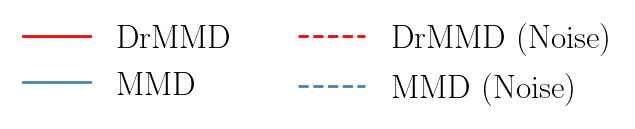

In [28]:
legend_elements = [plt.Line2D([0], [0], color=color_dict['chard'], lw=2, label='DrMMD'),
                   plt.Line2D([0], [0], color=color_dict['mmd'], lw=2, label='MMD'),
                   plt.Line2D([0], [0], color=color_dict['chard'], lw=2, linestyle='--', label='DrMMD (Noise)'),
                   plt.Line2D([0], [0], color=color_dict['mmd'], lw=2, linestyle='--', label='MMD (Noise)'),
                   ]
# Create a new figure and axis for the legend
legend_fig, legend_ax = plt.subplots(figsize=(6, 1))
legend_ax.set_axis_off()
legend_ax.legend(handles=legend_elements, loc='center', ncol=2, fontsize='large')
# plt.tight_layout()
plt.savefig(f'/home/zongchen/chard/figures/legend_student_teacher.pdf')
 

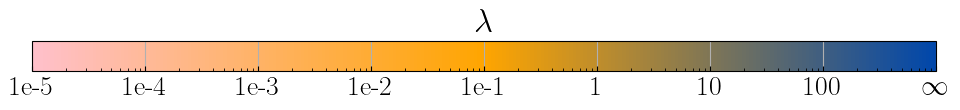

In [31]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define the RGB values for your start and end colors

# Define the RGB values for red, orange, and green
# color_3 = np.array([255, 0, 0]) / 255   # Red
color_2 = np.array([255, 165, 0]) / 255   # Orange
# color_1 = np.array([0, 150, 0]) / 255   # Green
# color_3 = np.array([255, 192, 203]) / 255   # Green

# color_1 = np.array([135, 206, 235]) / 255   # Sky Blue
color_1 = np.array([255, 192, 203]) / 255  # Coral Pink
# color_1 = np.array([11, 102, 35]) / 255   # Lavender
color_3 = np.array([0, 71, 171]) / 255   # Green

# Create a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", [color_1, color_2, color_3])

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(10, 1.5))

fig.subplots_adjust(bottom=0.5)

# Create a LogNorm object for logarithmic normalization
norm = mcolors.LogNorm(vmin=1e-5, vmax=1000)

# Create a ScalarMappable and initialize a data array
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create a color bar
cb = plt.colorbar(sm, cax=ax, orientation='horizontal')

ticks = jnp.array([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000])
cb.ax.tick_params(labelsize=20)  # You can adjust the value '12' to your preferred font size
cb.set_ticks([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000])
ax.set_title(r'$\lambda$', fontsize=24)

# Optionally, set custom tick labels
cb.set_ticklabels(['1e-5', '1e-4', '1e-3', '1e-2', '1e-1', '1', '10', '100', r'$\infty$'])
plt.tight_layout()
plt.savefig(f'/home/zongchen/chard/figures/colorbar_student_teacher.pdf')
plt.show()




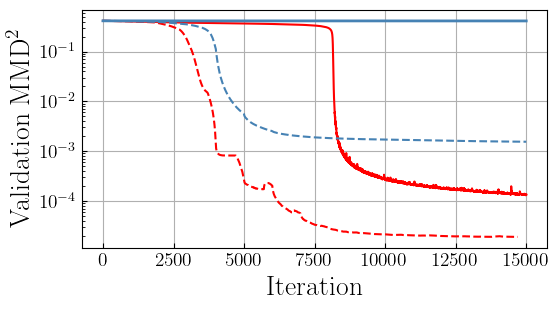

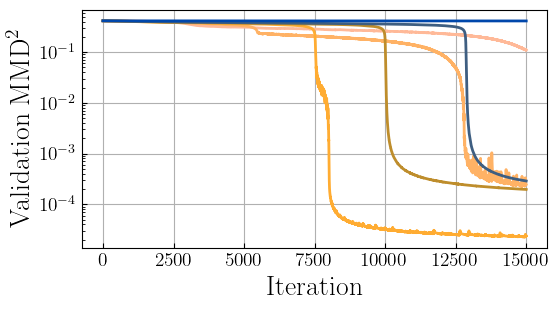

In [30]:
# lmbda_list = [0.001, 0.01, 0.03, 0.1, 1.0, 10.0, 100.0, 'infinity']
lmbda_list = [0.006, 0.01, 0.03, 1.0, 100.0, 'infinity']
lmbda_noise_list = [0.01, 0.03, 0.1, 1.0, 10.0, 100.0, 'infinity']

lmbda_label = {
                0.006: r'$\lambda = 10^{-4}$',
                0.01: r'$\lambda = 10^{-3}$',
                0.03: r'$\lambda = 10^{-2}$',
                0.1: r'$\lambda = 10^{-1}$',
                1.0: r'$\lambda = 10^{0}$',
                10.0: r'$\lambda = 10^{1}$',
                100.0: r'$\lambda = 10^{2}$',
                'infinity': r'$\lambda = \infty$'}

normalized_ticks = norm(ticks)
rgb_colors = cmap(normalized_ticks)[:,:3]

lmbda_color_dict = {  
    0.006: rgb_colors[1],
    0.01: rgb_colors[2],
    0.03: rgb_colors[3],
    0.1: rgb_colors[4],
    1.0: rgb_colors[5],
    100.0: rgb_colors[7],
    'infinity': rgb_colors[8]
            }

# set1 = plt.cm.get_cmap('Set1', 9) 
# lmbda_color_dict = {  
#     0.006: 'black',
#     0.01: set1(2), #'loosely dashed',
#     0.03: set1(4),
#     0.1: set1(3),
#     1.0: set1(0) ,
#     100.0: 'pink', #'densely dashed',
#     'infinity': 'steelblue'
#             }

fig, axs = plt.subplots(1, 1, figsize=(6, 3.5))
axs.set_xlabel('Iteration')
axs.set_ylabel(r'$\text{Validation MMD}^2$')
axs.plot(chard_test_mmd_noise_false[0.1], label=r'$\text{DMMD}$', color=color_dict['chard'], linewidth=1.5)
axs.plot(moving_average(chard_test_mmd_noise_true[0.1], window_size), label=r'$\text{DMMD (Noise)}$', color=color_dict['chard'], linestyle='--', linewidth=1.5)
axs.plot(chard_test_mmd_noise_false['infinity'], label=r'$\text{MMD}$', color=color_dict['mmd'], linewidth=2.0)
axs.plot(chard_test_mmd_noise_true['infinity'], label=r'$\text{MMD (Noise)}$', color=color_dict['mmd'], linestyle='--', linewidth=1.5)
axs.set_yscale('log')
# axs.legend(ncol=2, loc='upper left', bbox_to_anchor=(0.05, 1.3))
plt.tight_layout()
plt.savefig(f'/home/zongchen/chard/figures/student_teacher.pdf')

fig, axs = plt.subplots(1, 1, figsize=(6, 3.5))
axs.set_xlabel('Iteration')
axs.set_ylabel(r'$\text{Validation MMD}^2$')
for lmbda in lmbda_list:
    axs.plot(chard_test_mmd_noise_false[lmbda], label=lmbda_label[lmbda], linewidth=2.0, color=lmbda_color_dict[lmbda])
axs.set_yscale('log')
plt.tight_layout()
plt.savefig(f'/home/zongchen/chard/figures/student_teacher_lambda.pdf')
plt.show()